# **Análise Exploratória de Dados**

### **Perguntas:**

Número de competidores/duplas

Classes de vela extraídas

Competições extraídas

Número de competições por classe
  
Média de competidores por classe

Número de competidores por competição

Número de classes por competição

Média de regatas por classe

Média de regatas por classe em cada evento (evento ignora o ano)

Média de competidores por evento (evento ignora o ano)

Distribuição das punições

Distribuição das punições por classe

Distribuição das punições por evento

Competidores que mais participaram / menos participaram de competições

Competidores mais punidos em média

Competidores que mais variaram de classe

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('../data/final_data.xlsx')

## **Informações gerais do dataset**

In [3]:
df.head()

,Unnamed: 0,ID Resultado,ID Competidor,Nome Competidor,ID Competição,Classe Vela,Pontuação Regata,Descarte,Flotilha,Posição Geral,Punição,Pontuação Total,Nett,Nome Competição
0,0,1,1,"WILLIAM JONES, EVAN DEPAUL",17,49er,11,1,GERAL,1,UFD,44.0,33.0,World Championship 2017
1,1,2,2,"DOMINIK BUKSAK, SZYMON WIERZBICKI",7,49er,3,0,GERAL,1,NaN,89.0,66.0,Semaine Olympique Francaise De Voile 2022
2,2,3,2,"DOMINIK BUKSAK, SZYMON WIERZBICKI",7,49er,1,0,GERAL,1,NaN,89.0,66.0,Semaine Olympique Francaise De Voile 2022
3,3,4,2,"DOMINIK BUKSAK, SZYMON WIERZBICKI",7,49er,1,0,GERAL,1,NaN,89.0,66.0,Semaine Olympique Francaise De Voile 2022
4,4,5,2,"DOMINIK BUKSAK, SZYMON WIERZBICKI",7,49er,3,0,GERAL,1,NaN,89.0,66.0,Semaine Olympique Francaise De Voile 2022


In [4]:
print("O DataFrame contém {} entradas com {} colunas".format(df.shape[0], df.shape[1]))

O DataFrame contém 136618 entradas com 14 colunas


In [5]:
print("As colunas são: {}".format(df.columns.values))

As colunas são: ['Unnamed: 0' 'ID Resultado' 'ID Competidor' 'Nome Competidor'
 'ID Competição' 'Classe Vela' 'Pontuação Regata' 'Descarte' 'Flotilha'
 'Posição Geral' 'Punição' 'Pontuação Total' 'Nett' 'Nome Competição']


In [6]:
competidores = np.unique(df['Nome Competidor'])
print("No total, há {} competidores ou duplas".format(len(competidores)))

No total, há 3170 competidores ou duplas


In [7]:
classes = df['Classe Vela'].unique().tolist()
print("As classes de vela extraídas para análise foram: {}".format(classes))

As classes de vela extraídas para análise foram: ['49er', '49erFX', 'Nacra 17', '470.0', 'Ilca 6', 'IQFOIL Fem.', 'Formula Kite Masc.', 'IQFOIL Masc.', 'Formula Kite Fem.', 'Ilca 7']


In [8]:
competicoes = df['Nome Competição'].unique().tolist()
print("As competições extraídas para análise foram: {}".format(competicoes))

As competições extraídas para análise foram: ['World Championship 2017', 'Semaine Olympique Francaise De Voile 2022', 'Semaine Olympique Francaise De Voile 2015', 'Semaine Olympique Francaise De Voile 2016', 'Semaine Olympique Francaise De Voile 2023', 'Trofeo S.A.R Princesa Sofia 2015', 'Trofeo S.A.R Princesa Sofia 2016', 'Trofeo S.A.R Princesa Sofia 2017', 'Trofeo S.A.R Princesa Sofia 2018', 'Trofeo S.A.R Princesa Sofia 2019', 'Trofeo S.A.R Princesa Sofia 2022', 'Trofeo S.A.R Princesa Sofia 2023', 'World Championship 2021', 'World Championship 2022', 'World Championship 2023', 'Semaine Olympique Francaise De Voile 2018', 'World Championship 2018', 'World Championship 2015', 'European Championship 2016', 'World Championship 2016', 'Semaine Olympique Francaise De Voile 2017', 'European Championship 2020', 'European Championship 2022', 'European Championship 2023', 'World Championship 2019', 'European Championship 2021', 'World Championship 2020', 'European Championship 2017', 'European

### **Número de competições por classe**

In [9]:
competitions_by_class = df.groupby('Classe Vela')['ID Competição']\
                          .nunique()\
                          .sort_values(ascending=False)\
                          .reset_index(name='Número de Competições')

competitions_by_class

,Classe Vela,Número de Competições
0,49er,28
1,Ilca 6,28
2,Ilca 7,28
3,49erFX,27
4,470.0,7
5,IQFOIL Fem.,7
6,IQFOIL Masc.,7
7,Nacra 17,7
8,Formula Kite Fem.,6
9,Formula Kite Masc.,6


### **Média de competidores por classe em competições**

In [10]:
competitors_by_class_and_competition = df.groupby(['Classe Vela', 'ID Competição'])['Nome Competidor']\
                                         .nunique()\
                                         .sort_values(ascending=False)

mean_ncompetitors_by_class = competitors_by_class_and_competition.groupby('Classe Vela')\
                                                                 .mean()\
                                                                 .sort_values(ascending=True)\
                                                                 .reset_index(name="Média de Competidores")

mean_ncompetitors_by_class

,Classe Vela,Média de Competidores
0,Nacra 17,37.285714
1,49erFX,43.222222
2,Formula Kite Fem.,47.500000
3,470.0,60.857143
4,49er,65.821429
5,IQFOIL Fem.,75.142857
6,Ilca 6,87.142857
7,Formula Kite Masc.,90.000000
8,IQFOIL Masc.,105.428571
9,Ilca 7,123.000000


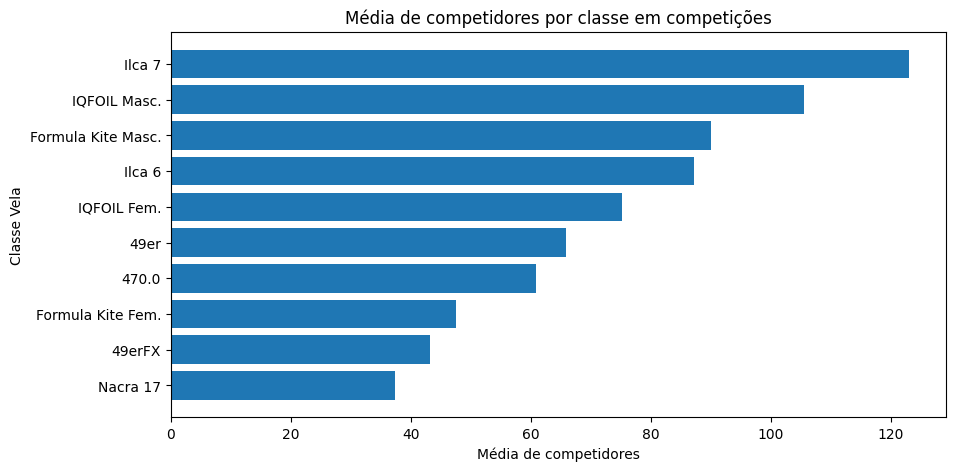

In [11]:
#plots the data above
plt.figure(figsize=(10,5))
plt.barh(mean_ncompetitors_by_class['Classe Vela'], mean_ncompetitors_by_class['Média de Competidores'])
plt.title('Média de competidores por classe em competições')
plt.xlabel('Média de competidores')	
plt.ylabel('Classe Vela')
plt.show()

### **Número de competidores por competição**

In [12]:
competitors_by_competition = df.groupby('Nome Competição')['Nome Competidor']\
                               .nunique()\
                               .reset_index(name='Número de Competidores')\
                               .sort_values(by='Número de Competidores', ascending=False)

competitors_by_competition.head()

,Nome Competição,Número de Competidores
22,Trofeo S.A.R Princesa Sofia 2023,976
8,European Championship 2022,866
31,World Championship 2023,816
30,World Championship 2022,672
15,Semaine Olympique Francaise De Voile 2023,666


### **Número de classes por competição**

In [13]:
classes_by_competition = df.groupby('Nome Competição')['Classe Vela']\
                            .nunique()\
                            .reset_index(name='Número de Classes')\
                            .sort_values(by='Número de Classes', ascending=False)

classes_by_competition.head()

,Nome Competição,Número de Classes
31,World Championship 2023,10
15,Semaine Olympique Francaise De Voile 2023,10
14,Semaine Olympique Francaise De Voile 2022,10
22,Trofeo S.A.R Princesa Sofia 2023,10
8,European Championship 2022,10


### **Média de regatas por classe**

In [14]:
# pego o numero de regatas por competidor
nregatas_por_competidor = df.groupby(['Nome Competidor', 'Classe Vela', 'Nome Competição'])['Nome Competidor'].count().reset_index(name='Número de Regatas')

# pego o numero maximo de regatas (competidor que correu todas)
max_regatas = nregatas_por_competidor.groupby(['Nome Competição', 'Classe Vela'])['Número de Regatas'].max().reset_index(name='Número de Regatas')

max_regatas.head()

,Nome Competição,Classe Vela,Número de Regatas
0,Central and South American Championship 2021,Ilca 6,8
1,Central and South American Championship 2021,Ilca 7,8
2,Central and South American Championship 2022,Ilca 6,10
3,Central and South American Championship 2022,Ilca 7,10
4,Central and South American Championship 2023,Ilca 6,9


In [15]:
media_regatas_por_classe = max_regatas.groupby('Classe Vela')['Número de Regatas'].mean().reset_index(name='Média de Regatas').sort_values(by='Média de Regatas', ascending=True)

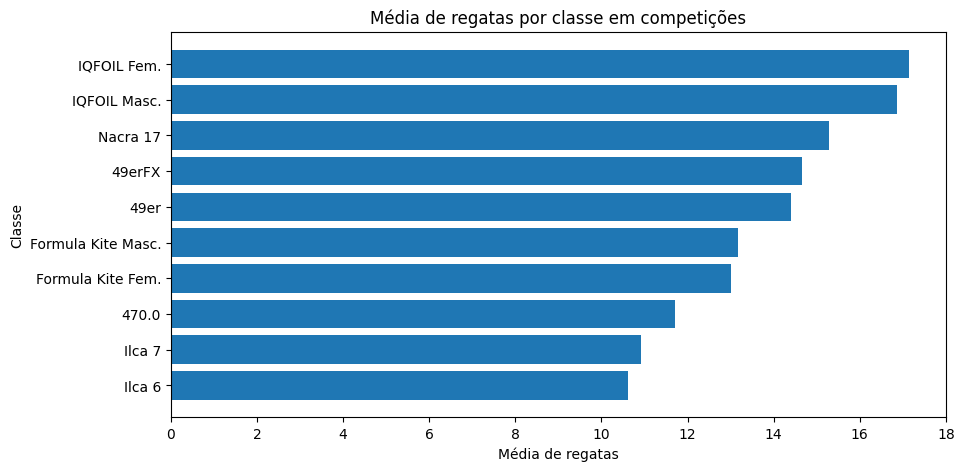

In [16]:
#plots the data above
plt.figure(figsize=(10,5))
plt.barh(media_regatas_por_classe['Classe Vela'], media_regatas_por_classe['Média de Regatas'])
plt.title('Média de regatas por classe em competições')
plt.xlabel('Média de regatas')	
plt.ylabel('Classe')
plt.show()

### **Média de regatas por classe em cada evento**

In [17]:
dfProv = df.copy()

#competição sem ano (sem os ultimos 4 caracteres)
dfProv['Evento'] = dfProv['Nome Competição'].str[:-5]

In [18]:
dfProv.head()

,Unnamed: 0,ID Resultado,ID Competidor,Nome Competidor,ID Competição,Classe Vela,Pontuação Regata,Descarte,Flotilha,Posição Geral,Punição,Pontuação Total,Nett,Nome Competição,Evento
0,0,1,1,"WILLIAM JONES, EVAN DEPAUL",17,49er,11,1,GERAL,1,UFD,44.0,33.0,World Championship 2017,World Championship
1,1,2,2,"DOMINIK BUKSAK, SZYMON WIERZBICKI",7,49er,3,0,GERAL,1,NaN,89.0,66.0,Semaine Olympique Francaise De Voile 2022,Semaine Olympique Francaise De Voile
2,2,3,2,"DOMINIK BUKSAK, SZYMON WIERZBICKI",7,49er,1,0,GERAL,1,NaN,89.0,66.0,Semaine Olympique Francaise De Voile 2022,Semaine Olympique Francaise De Voile
3,3,4,2,"DOMINIK BUKSAK, SZYMON WIERZBICKI",7,49er,1,0,GERAL,1,NaN,89.0,66.0,Semaine Olympique Francaise De Voile 2022,Semaine Olympique Francaise De Voile
4,4,5,2,"DOMINIK BUKSAK, SZYMON WIERZBICKI",7,49er,3,0,GERAL,1,NaN,89.0,66.0,Semaine Olympique Francaise De Voile 2022,Semaine Olympique Francaise De Voile


In [19]:
# pego o numero de regatas por competidor
nregatas_por_competidor = dfProv.groupby(['Nome Competidor', 'Classe Vela', 'Nome Competição', 'Evento'])['Nome Competidor'].count().reset_index(name='Número de Regatas')

# pego o numero maximo de regatas (competidor que correu todas)
max_regatas = nregatas_por_competidor.groupby(['Nome Competição', 'Classe Vela', 'Evento'])['Número de Regatas'].max().reset_index(name='Número de Regatas')

# faço a média de regatas por evento
media_regatas_classe_evento = max_regatas.groupby(['Classe Vela', 'Evento'])['Número de Regatas'].mean().reset_index(name='Média de Regatas')

media_regatas_classe_evento.head()

,Classe Vela,Evento,Média de Regatas
0,470.0,European Championship,12.000000
1,470.0,Semaine Olympique Francaise De Voile,10.500000
2,470.0,Trofeo S.A.R Princesa Sofia,11.000000
3,470.0,World Championship,13.000000
4,49er,European Championship,14.166667


In [20]:
eventos = media_regatas_classe_evento['Evento'].unique().tolist()

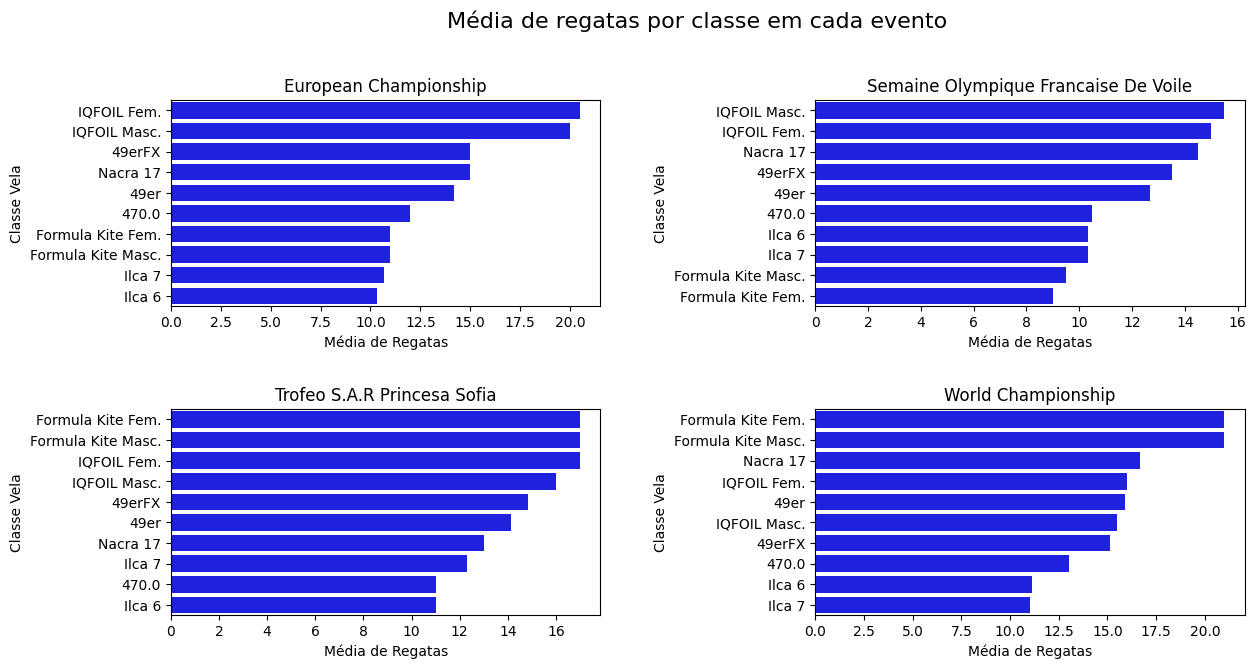

In [21]:
# Classe Vela in different subplots, Punicao in x axis and freq in y axis
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12,10))
fig.suptitle('Média de regatas por classe em cada evento', fontsize=16)
fig.tight_layout(pad=3.0)
for i, evento in enumerate(eventos):
    ax = axes[i//2, i%2]
    ax.set_title(evento)
    ax.set_xlabel('Punição')
    ax.set_ylabel('Porcentagem (%)')
    # horizontal bar plot
    sns.barplot(x='Média de Regatas', y='Classe Vela', 
                data=media_regatas_classe_evento[media_regatas_classe_evento['Evento']==evento].sort_values(by='Média de Regatas', ascending=False),
                ax=ax,
                color='blue')
    
# increase space between subplots
fig.subplots_adjust(hspace=0.5, wspace=0.5)

# delete the last subplot
fig.delaxes(axes[2,0])
fig.delaxes(axes[2,1]) 
    
plt.show()

### **Média de competidores por Evento (ignorando o ano)**

In [22]:
#groups the data per class and then per competition and then counts the unique competitors
competitors_by_class_and_event = dfProv.groupby(['Evento', 'ID Competição'])['Nome Competidor']\
                                       .nunique()\
                                       .sort_values(ascending=False)

#now takes the mean inside each class
mean_ncompetitors_by_class = competitors_by_class_and_event.groupby('Evento')\
                                                           .mean()\
                                                           .sort_values(ascending=True)\
                                                           .reset_index(name="Média de Competidores")

mean_ncompetitors_by_class

,Evento,Média de Competidores
0,Central and South American Championship,112.333333
1,European Championship,312.285714
2,Semaine Olympique Francaise De Voile,317.666667
3,World Championship,431.000000
4,Trofeo S.A.R Princesa Sofia,476.142857


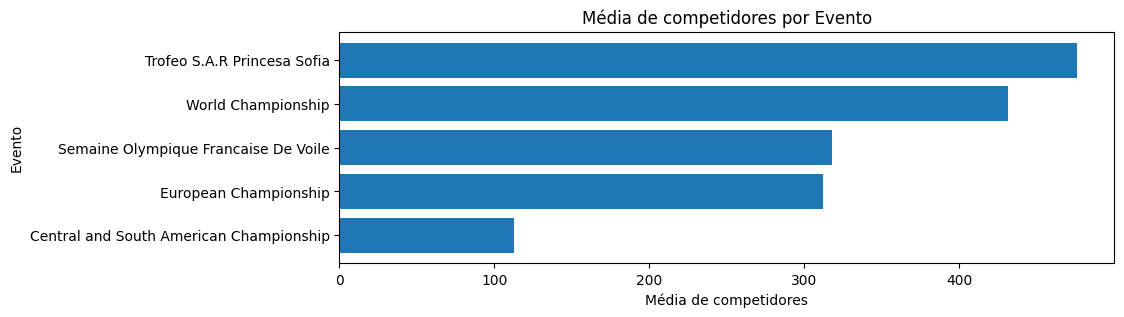

In [23]:
#plots the data above
plt.figure(figsize=(10,3))
plt.barh(mean_ncompetitors_by_class['Evento'], mean_ncompetitors_by_class['Média de Competidores'])
plt.title('Média de competidores por Evento')
plt.xlabel('Média de competidores')	
plt.ylabel('Evento')
plt.show()

### **Distribuição das punições**

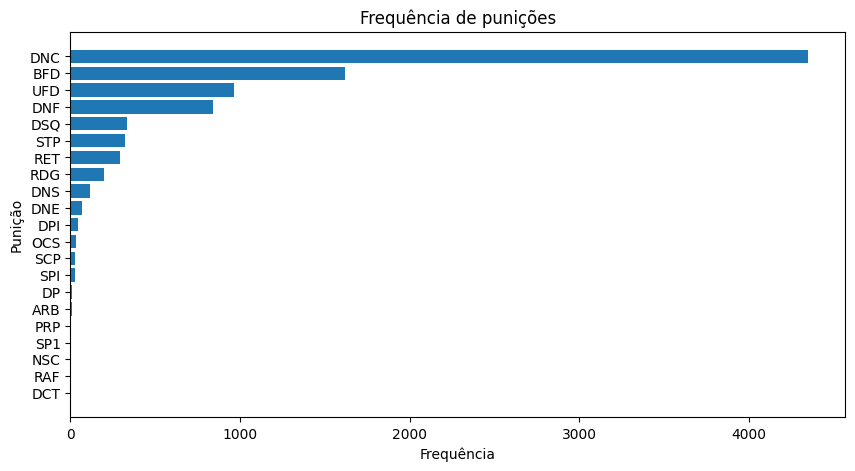

In [24]:
#show the frequency of each punishment
punicao = df['Punição'].value_counts().sort_values(ascending=True)

#plots the data above
plt.figure(figsize=(10,5))
plt.title('Frequência de punições')
plt.xlabel('Frequência')
plt.ylabel('Punição')
plt.barh(punicao.index, punicao.values)
plt.show()

### **Distribuição das punições por classe**

In [25]:
npunicoes_por_classe = df.groupby(['Classe Vela', 'Punição'])['Punição'].count().sort_values(ascending=False).reset_index(name='Frequência')
npunicoes_por_classe.head()

,Classe Vela,Punição,Frequência
0,Ilca 7,DNC,827
1,49er,DNC,803
2,Ilca 7,BFD,616
3,49erFX,DNC,604
4,Formula Kite Masc.,DNC,540


In [26]:
total_punicoes_por_classe = df.groupby(['Classe Vela'])['Punição'].count().sort_values(ascending=False).reset_index(name='Total de Punições')
total_punicoes_por_classe.head()

,Classe Vela,Total de Punições
0,Ilca 7,2192
1,49er,1696
2,Ilca 6,1267
3,49erFX,1120
4,IQFOIL Masc.,963


In [27]:
npunicoes_por_classe = npunicoes_por_classe.merge(total_punicoes_por_classe, on='Classe Vela')
npunicoes_por_classe['Porcentagem'] = (npunicoes_por_classe['Frequência'] / npunicoes_por_classe['Total de Punições']) * 100

In [28]:
npunicoes_por_classe.head()

,Classe Vela,Punição,Frequência,Total de Punições,Porcentagem
0,Ilca 7,DNC,827,2192,37.728102
1,Ilca 7,BFD,616,2192,28.102190
2,Ilca 7,UFD,230,2192,10.492701
3,Ilca 7,STP,134,2192,6.113139
4,Ilca 7,DNF,111,2192,5.063869


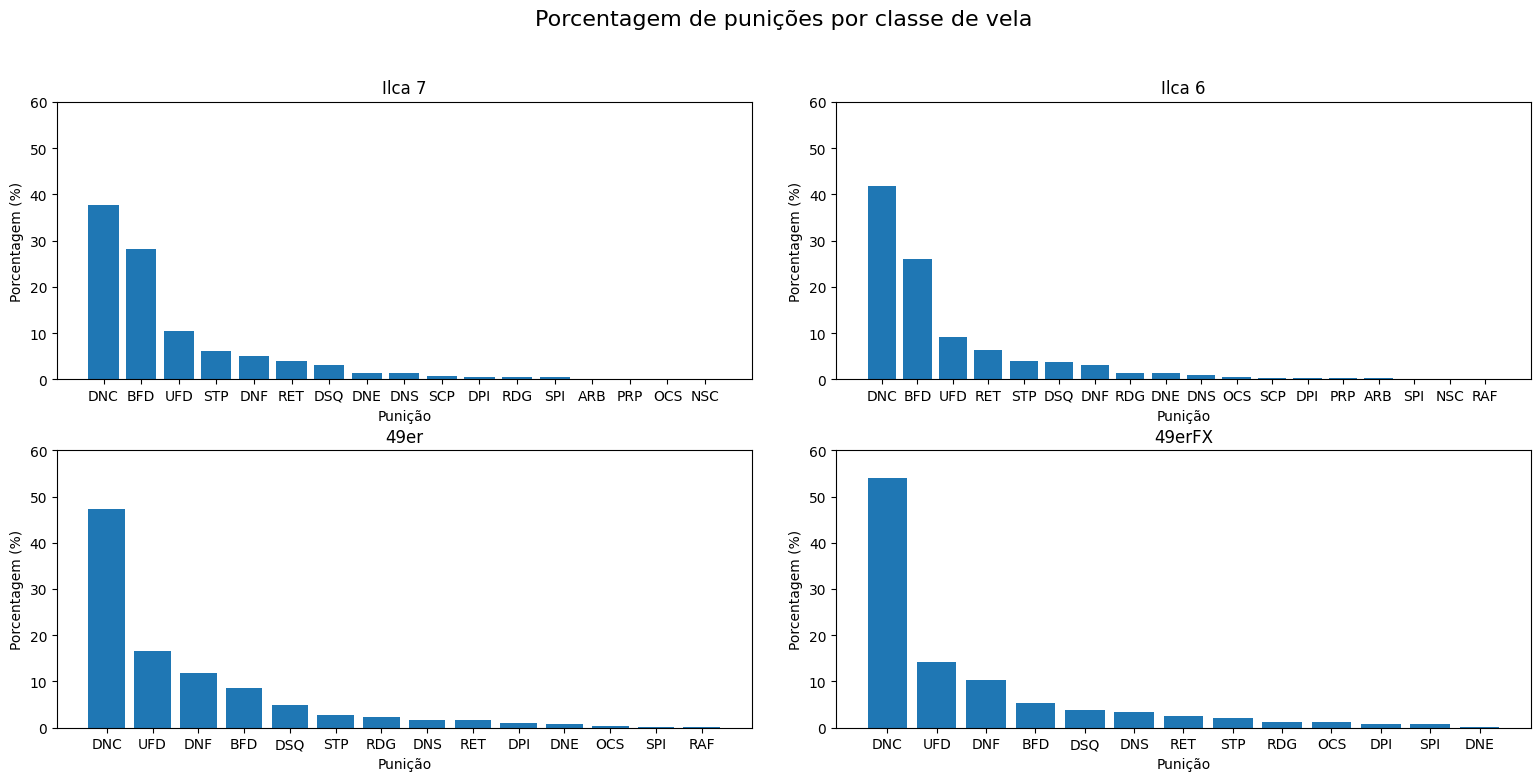

In [529]:
classes = ["Ilca 7", "Ilca 6", "49er", "49erFX"]

# Classe Vela in different subplots, Punicao in x axis and freq in y axis
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16,8))
fig.subplots_adjust(hspace=1)
fig.suptitle('Porcentagem de punições por classe de vela', fontsize=16)
fig.tight_layout(pad=3.0)
for i, classe in enumerate(classes):
    ax = axes[i//2, i%2]
    ax.set_title(classe)
    ax.set_xlabel('Punição')
    ax.set_ylabel('Porcentagem (%)')
    ax.set_ylim([0, 60])
    ax.bar(npunicoes_por_classe[npunicoes_por_classe['Classe Vela'] == classe]['Punição'], 
           npunicoes_por_classe[npunicoes_por_classe['Classe Vela'] == classe]['Porcentagem'])
    
plt.show()

In [ ]:
classes = df['Classe Vela'].unique().tolist()

### **Distribuição das punições por evento**

In [30]:
npunicoes_por_competicao = dfProv.groupby(['Evento', 'Punição'])['Punição'].count().sort_values(ascending=False).reset_index(name='Frequência')
npunicoes_por_competicao.head()

,Evento,Punição,Frequência
0,Trofeo S.A.R Princesa Sofia,DNC,1892
1,European Championship,DNC,1135
2,Semaine Olympique Francaise De Voile,DNC,595
3,World Championship,DNC,548
4,World Championship,BFD,510


In [31]:
total_punicoes_por_competicao = dfProv.groupby(['Evento'])['Punição'].count().sort_values(ascending=False).reset_index(name='Total de Punições')
total_punicoes_por_competicao.head()

,Evento,Total de Punições
0,Trofeo S.A.R Princesa Sofia,3636
1,European Championship,2396
2,World Championship,1786
3,Semaine Olympique Francaise De Voile,1221
4,Central and South American Championship,240


In [32]:
npunicoes_por_competicao = npunicoes_por_competicao.merge(total_punicoes_por_competicao, on='Evento')
npunicoes_por_competicao['Porcentagem'] = (npunicoes_por_competicao['Frequência'] / npunicoes_por_competicao['Total de Punições']) * 100

In [33]:
eventos = npunicoes_por_competicao['Evento'].unique().tolist()

In [34]:
npunicoes_por_competicao.head()

,Evento,Punição,Frequência,Total de Punições,Porcentagem
0,Trofeo S.A.R Princesa Sofia,DNC,1892,3636,52.035204
1,Trofeo S.A.R Princesa Sofia,BFD,483,3636,13.283828
2,Trofeo S.A.R Princesa Sofia,UFD,481,3636,13.228823
3,Trofeo S.A.R Princesa Sofia,STP,236,3636,6.490649
4,Trofeo S.A.R Princesa Sofia,DNF,203,3636,5.583058


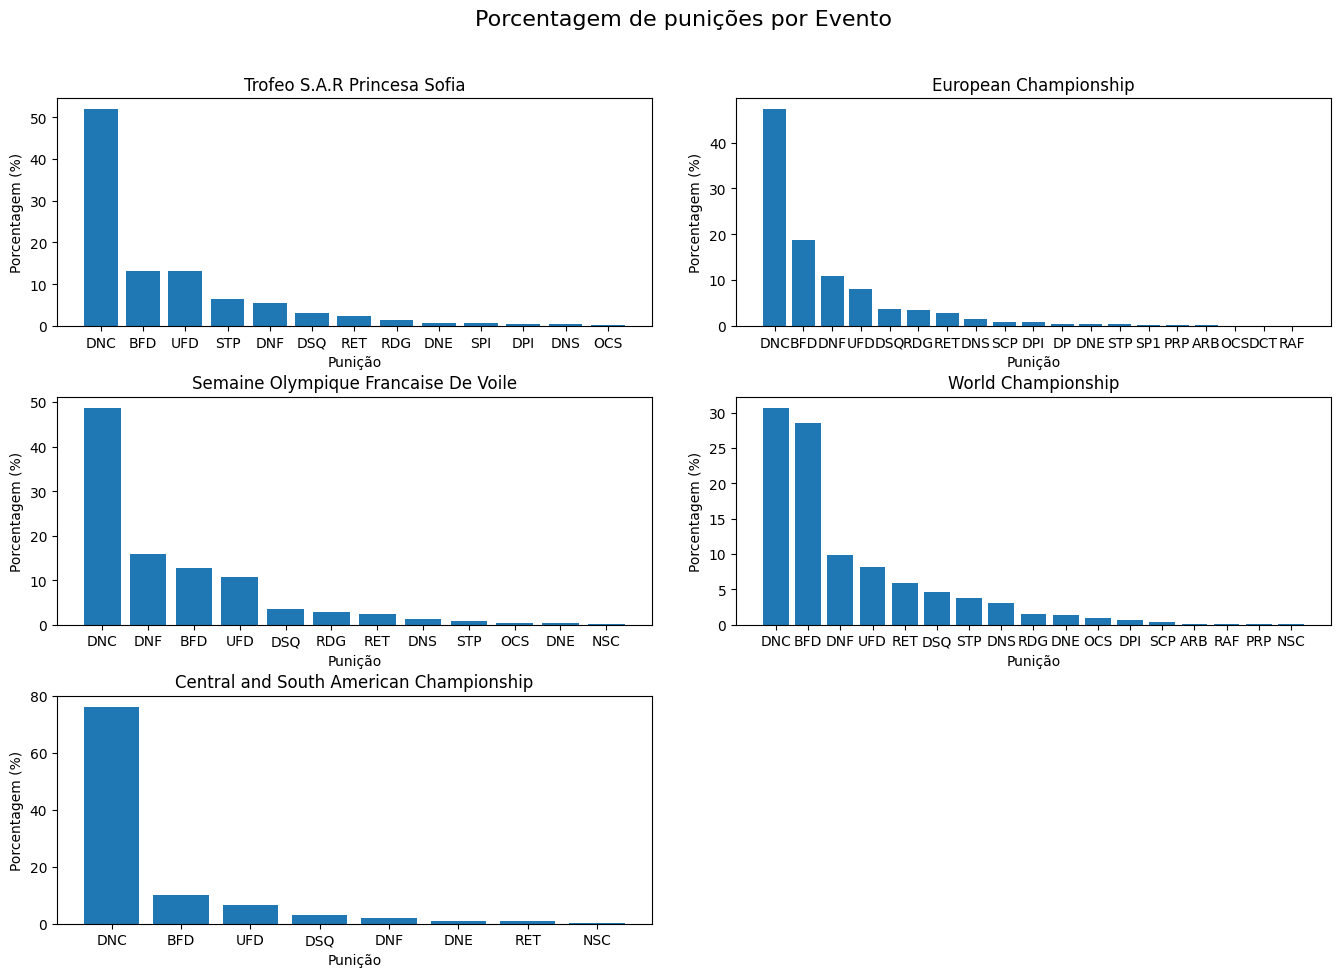

In [35]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14,10))
fig.subplots_adjust(hspace=1)
fig.suptitle('Porcentagem de punições por Evento', fontsize=16)
fig.tight_layout(pad=3.0)
for i, evento in enumerate(eventos):
    ax = axes[i//2, i%2]
    ax.set_title(evento)
    ax.set_xlabel('Punição')
    ax.set_ylabel('Porcentagem (%)')
    ax.bar(npunicoes_por_competicao[npunicoes_por_competicao['Evento'] == evento]['Punição'], 
           npunicoes_por_competicao[npunicoes_por_competicao['Evento'] == evento]['Porcentagem'])
    
# remove last subplot
fig.delaxes(axes[2,1])

plt.show()

### **Competidores com mais punições**

In [36]:
# pegar o numero de regatas que o competidor correu por campeonato
# contar em quantas regatas ele tomou punição
# tirar a média por competidor desse percentual de regatas que ele tomou punição por campeonato

In [37]:
nregatas_por_competidor = df.groupby(['Nome Competidor', 'Nome Competição'])['Nome Competidor'].count().reset_index(name='Número de Regatas')
nregatas_por_competidor.head()

,Nome Competidor,Nome Competição,Número de Regatas
0,ABAY BERKAY,European Championship 2022,9
1,ABAY BERKAY,European Championship 2023,10
2,ABAY BERKAY,Semaine Olympique Francaise De Voile 2022,9
3,ABAY BERKAY,Semaine Olympique Francaise De Voile 2023,10
4,ABAY BERKAY,Trofeo S.A.R Princesa Sofia 2017,10


In [38]:
npunicoes_por_competidor = df.groupby(['Nome Competidor', 'Nome Competição'])['Punição'].count().sort_values(ascending=False).reset_index(name='Número de Punições')
npunicoes_por_competidor.head()

,Nome Competidor,Nome Competição,Número de Punições
0,MICHELE LAURENZA,European Championship 2022,20
1,"BRICE YRIEIX, ALBANE DUBOIS",European Championship 2016,18
2,YOUSSEF BEN ALI,Trofeo S.A.R Princesa Sofia 2023,16
3,CHAVDAR ALEKSANDROV,Trofeo S.A.R Princesa Sofia 2023,16
4,THOMAS CROOK,Semaine Olympique Francaise De Voile 2022,16


In [39]:
nregatas_por_competidor = nregatas_por_competidor.merge(npunicoes_por_competidor, on=['Nome Competidor', 'Nome Competição'])

In [40]:
nregatas_por_competidor['Porcentagem de Punições'] = (nregatas_por_competidor['Número de Punições'] / nregatas_por_competidor['Número de Regatas']) * 100

❗**COMO LER:** Das competições que o competidor $x$ participou, ele foi punido em média em $y\%$ das regatas.

In [41]:
media_punicoes_por_competidor = nregatas_por_competidor.groupby('Nome Competidor')['Porcentagem de Punições'].mean().sort_values(ascending=False).reset_index(name='Média de Punições')
media_punicoes_por_competidor.head()

,Nome Competidor,Média de Punições
0,JUAN FRANCISCO ZARATE,100.0
1,TSOTRAS ANTONIS,100.0
2,"GWENDAL NAEL, BREWAL NAEL",100.0
3,"BRICE YRIEIX, ALBANE DUBOIS",100.0
4,"EVAN SJOSTEDT, GARRETT BROWN",100.0


### **Competidores que mais participaram / menos participaram de competições**

In [42]:
ncompetitions_por_competidor = df.groupby('Nome Competidor')['Nome Competição'].nunique().reset_index(name='Número de Competições').sort_values(by='Número de Competições', ascending=False)
ncompetitions_por_competidor.head(10)

,Nome Competidor,Número de Competições
1188,"HELENE NAESS, MARIE RONNINGEN",25
20,AGATA BARWINSKA,24
2133,MAXIME JONKER,23
2177,MICHON PERNELLE,23
3045,VIKTORIJA ANDRULYTE,23
842,EMMA PLASSCHAERT,22
939,FILIP JURISIC,22
770,ECEM GUZEL,22
3007,VASILEIA KARACHALIOU,22
1833,LUCIA FALASCA,22


In [43]:
df.query('`Nome Competidor` == "AGATA BARWINSKA"')["Classe Vela"].unique()

array(['Ilca 6'], dtype=object)

In [44]:
df.query('`Nome Competidor` == "HELENE NAESS, MARIE RONNINGEN"')["Classe Vela"].unique()

array(['49erFX'], dtype=object)

In [45]:
df.query('`Nome Competidor` == "VASILEIA KARACHALIOU"')["Classe Vela"].unique()

array(['Ilca 6'], dtype=object)

In [46]:
print("O número médio de competições por competidor é: {}".format(ncompetitions_por_competidor['Número de Competições'].mean().round(2)))
print("{} competidores participaram de apenas uma competição".format(len(ncompetitions_por_competidor.query('`Número de Competições` == 1'))))

O número médio de competições por competidor é: 3.67
1237 competidores participaram de apenas uma competição


#### **Hipótese:** competidores que participaram apenas uma competição teriam desistido do esporte por terem obtido um número alto de punições. 

❗ Os competidores que participaram de **apenas uma competição** só foram punidos, em média, em **13.2%** das regatas que participaram.

❗ Os competidores que participaram de **mais de uma competição** foram punidos em média em **7.26%**.

In [47]:
ncompetitions_por_competidor = ncompetitions_por_competidor.merge(media_punicoes_por_competidor, on='Nome Competidor')
ncompetitions_por_competidor.query('`Número de Competições` == 1').sort_values(by='Média de Punições', ascending=False)

,Nome Competidor,Número de Competições,Média de Punições
2367,DANI CARDONA,1,100.0
2142,XIAONI CHEN,1,100.0
2541,"BENNET STEFFENS, MORITZ BLOCK",1,100.0
2320,"EVAN SJOSTEDT, GARRETT BROWN",1,100.0
2410,GIORGIO CAIOZZI,1,100.0
...,...,...,...
2495,"FRANCISCO PICCINI, TOMAS WAGMAISTER",1,0.0
2496,ALDERS KULYNYCH-IRVIN,1,0.0
2497,FRANCISCO GOMEZ,1,0.0
2498,FRANCESCO CAPPUZZO,1,0.0


In [48]:
ncompetitions_por_competidor.query('`Número de Competições` == 1').sort_values(by='Média de Punições', ascending=False)["Média de Punições"].mean()

13.768783399828623

In [49]:
ncompetitions_por_competidor.query('`Número de Competições` > 1').sort_values(by='Média de Punições', ascending=False)["Média de Punições"].mean()

7.463219154271734

### **Competidores que mais variaram de classe**

In [50]:
nclasses_por_competidor = df.groupby('Nome Competidor')['Classe Vela'].nunique().reset_index(name='Número de Classes').sort_values(by='Número de Classes', ascending=False)
nclasses_por_competidor.head(10)

,Nome Competidor,Número de Classes
415,BRUNO GRUNWALDT,2
1739,LENA HAVERLAND,2
255,ARIEL ZERPA,2
1956,MARIA ASHIDA,2
859,ERICK CARPES,2
2428,PEDRO MADUREIRA,2
466,CARLOS TOMAS GABASIO,2
59,ALCIR CACHAPUZ,2
652,DANIEL SELF,2
1932,MARCELO FREZZA,2


❗**Os competidores passaram por no máximo 2 classes diferentes**. Vários dos homens que passaram por duas classes diferentes competiram pelo Ilca 6 e Ilca 7

In [51]:
print("O número de competidores que competiram por uma única classe {}".format(len(nclasses_por_competidor.query('`Número de Classes` == 1'))))
print("O número de competidores que já competiram por duas classes diferentes é {}".format(len(nclasses_por_competidor.query('`Número de Classes` == 2'))))

O número de competidores que competiram por uma única classe 3130
O número de competidores que já competiram por duas classes diferentes é 40


In [52]:
df.query('`Nome Competidor` == "MARIA ASHIDA"')["Classe Vela"].unique()

array(['Ilca 6', 'Formula Kite Fem.'], dtype=object)

In [53]:
df.query('`Nome Competidor` == "NICK GRAEL"')["Classe Vela"].unique()

array(['Ilca 7', 'Ilca 6'], dtype=object)

---

### **Rotatividade das competições (2021-2023)**

In [530]:
df = pd.read_excel('../data/final_data.xlsx')

In [531]:
import plotly.express as px

In [534]:
def graph_ja_competiu(df, campeonatos, quando="ano_anterior", classe: list = None):
    dfFinal = pd.DataFrame()
    dfProv = df.copy()
    classes_copy = classe.copy()

    if quando == "qualquer_ano":
        historico_competidores = []
    
    if classe is not None:
        df = df[df['Classe Vela'].isin(classe)]
    
    for classe in df['Classe Vela'].unique().tolist():
        # para cada campeonato
        for campeonato in campeonatos:
            
            # se for o primeiro da lista, usa como baseline
            if campeonato == campeonatos[0]:
                flt = df['Nome Competição'] == campeonato
                dfProv = df[flt]

                # se for o ano anterior
                if quando == "ano_anterior":
                    # pega os competidores do ano anterior
                    competidores_ano_anterior = dfProv['Nome Competidor'].unique().tolist()
                # se for qualquer ano
                elif quando == "qualquer_ano":
                    # adiciona na lista historica de competidores
                    historico_competidores = dfProv['Nome Competidor'].unique().tolist()

            # caso contrário
            else:
                flt = df['Nome Competição'] == campeonato
                dfProv = df[flt]
                dfProv = dfProv[["ID Competidor", "Nome Competidor", "Classe Vela", "Nome Competição"]].drop_duplicates()

                if quando == "ano_anterior":
                    competiu_ano_anterior = []
                    # checa se o competidor competiu no ano anterior
                    for competidor in dfProv['Nome Competidor']:
                        if competidor in competidores_ano_anterior:
                            # adiciona 1 se competiu no ano anterior
                            competiu_ano_anterior.append(1)
                        else:
                            # adiciona 0 se não competiu no ano anterior
                            competiu_ano_anterior.append(0)
                    
                    # adiciona a coluna de competiu no ano anterior
                    dfProv['Competiu no ano anterior'] = competiu_ano_anterior

                    # atualiza a lista de competidores do ano anterior
                    competidores_ano_anterior = dfProv['Nome Competidor'].unique().tolist()
                
                elif quando == "qualquer_ano":
                    competiu_qualquer_ano = []
                    # checa se o competidor competiu em qualquer ano
                    for competidor in dfProv['Nome Competidor']:
                        if competidor in historico_competidores:
                            # adiciona 1 se competiu em qualquer ano
                            competiu_qualquer_ano.append(1)
                        else:
                            # adiciona 0 se não competiu em qualquer ano
                            competiu_qualquer_ano.append(0)

                    # adiciona a coluna de competiu em qualquer ano
                    dfProv['Competiu em qualquer ano'] = competiu_qualquer_ano

                    # atualiza a lista de competidores do ano anterior, sem usar append
                    for competidor in dfProv['Nome Competidor'].unique().tolist():
                        historico_competidores.append(competidor)

                    historico_competidores = list(set(historico_competidores))

                    #print(historico_competidores)

                # concatena o df provisorio com o dfFinal
                dfFinal = pd.concat([dfFinal, dfProv])

    if classe is not None:
        if quando == "ano_anterior":
            # calcula a porcentagem de competidores que competiram no ano anterior
            dfFinal = dfFinal.groupby("Nome Competição", "Classe Vela")["Competiu no ano anterior"]\
                            .value_counts(normalize=True)\
                            .reset_index(name="Porcentagem")
            
            dfFinal["Porcentagem"] = dfFinal["Porcentagem"] * 100
        
        elif quando == "qualquer_ano":
            # calcula a porcentagem de competidores que competiram no ano anterior
            dfFinal = dfFinal.groupby(["Nome Competição", "Classe Vela"])["Competiu em qualquer ano"]\
                            .value_counts(normalize=True)\
                            .reset_index(name="Porcentagem")
            
            dfFinal["Porcentagem"] = dfFinal["Porcentagem"] * 100
        
    else:
        if quando == "ano_anterior":
            # calcula a porcentagem de competidores que competiram no ano anterior
            dfFinal = dfFinal.groupby("Nome Competição")["Competiu no ano anterior"]\
                            .value_counts(normalize=True)\
                            .reset_index(name="Porcentagem")
            
            dfFinal["Porcentagem"] = dfFinal["Porcentagem"] * 100
        
        elif quando == "qualquer_ano":
            # calcula a porcentagem de competidores que competiram no ano anterior
            dfFinal = dfFinal.groupby("Nome Competição")["Competiu em qualquer ano"]\
                            .value_counts(normalize=True)\
                            .reset_index(name="Porcentagem")
            
            dfFinal["Porcentagem"] = dfFinal["Porcentagem"] * 100
        

    if quando == "ano_anterior":
        title_ = 'Porcentagem de competidores que competiram no ano anterior'
        hue_ = "Competiu no ano anterior"
    
    elif quando == "qualquer_ano":
        title_ = 'Porcentagem de competidores que competiram em qualquer ano anterior'
        hue_ = "Competiu em qualquer ano"
        
    change_names = {
        'World Championship 2015': 'WC 2015',
        'World Championship 2016': 'WC 2016',
        'World Championship 2017': 'WC 2017',
        'World Championship 2018': 'WC 2018',
        'World Championship 2019': 'WC 2019',
        'World Championship 2020': 'WC 2020',
        'World Championship 2021': 'WC 2021',
        'World Championship 2022': 'WC 2022',
        'World Championship 2023': 'WC 2023'
    }
    
    dfFinal['Nome Competição'] = dfFinal['Nome Competição'].replace(change_names)
    dfFinal[hue_] = dfFinal[hue_].replace({0: 'Não competiu', 1: 'Competiu'})
    
    if classe is not None:
        fig = px.bar(dfFinal, 
                     x="Nome Competição", 
                     y="Porcentagem", 
                     color=hue_, 
                     color_discrete_sequence=['#003276', '#FBA00A'],
                     barmode="stack", 
                     facet_col="Classe Vela",
                     facet_col_wrap=2,
                     facet_row_spacing=0.1,
                     title=title_, 
                     category_orders={"Classe Vela": classes_copy},
                     labels={'Competiu em qualquer ano': ''})
    
        fig.update_layout(width = 1250, height = 800, plot_bgcolor = 'white', paper_bgcolor = 'white')
        fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))
        fig.update_xaxes(showline=True, linewidth=1, linecolor='black', mirror=True)
        fig.update_yaxes(showline=True, linewidth=1, linecolor='black', mirror=True)
        
        # increase title size and color
        fig.update_layout(title_font_size=20, title_font_color='black', title_x=0.5)
        
        # show x-axis labels for all subplots
        fig.update_xaxes(showticklabels=True)
        
        # increase size of annotations
        fig.update_layout(annotations = [dict(xref='paper', yref='paper',showarrow=False, font=dict(size=15))])
        
        fig.show()

In [535]:
campeonatos = ['World Championship 2015', 'World Championship 2016', 'World Championship 2017',
               'World Championship 2018', 'World Championship 2019', 'World Championship 2020',
               'World Championship 2021', 'World Championship 2022', 'World Championship 2023']

graph_ja_competiu(df = df, 
                  campeonatos=campeonatos,
                  quando="qualquer_ano",
                  classe = ['Ilca 7', 'Ilca 6', '49er', '49erFX'])

---

### **Relação entre participar de muitas competições e ficar nos primeiros lugares**

In [283]:
ncompetitions_por_competidor = df.groupby('Nome Competidor')['Nome Competição'].nunique().reset_index(name='Número de Competições').sort_values(by='Número de Competições', ascending=False)
ncompetitions_por_competidor.head()

,Nome Competidor,Número de Competições
1188,"HELENE NAESS, MARIE RONNINGEN",25
20,AGATA BARWINSKA,24
2133,MAXIME JONKER,23
2177,MICHON PERNELLE,23
3045,VIKTORIJA ANDRULYTE,23


In [284]:
competitor_pos_per_competition = df[["Nome Competidor", "Posição Geral", "Nome Competição", "Classe Vela"]].drop_duplicates()\
                                                                                                           .sort_values(by='Posição Geral', ascending=True)

In [285]:
competitor_pos_per_competition = competitor_pos_per_competition.merge(ncompetitions_por_competidor, on='Nome Competidor')

In [286]:
competitor_pos_per_competition

,Nome Competidor,Posição Geral,Nome Competição,Classe Vela,Número de Competições
0,"WILLIAM JONES, EVAN DEPAUL",1,World Championship 2017,49er,11
1,"WILLIAM JONES, EVAN DEPAUL",37,Semaine Olympique Francaise De Voile 2018,49er,11
2,"WILLIAM JONES, EVAN DEPAUL",39,World Championship 2020,49er,11
3,"WILLIAM JONES, EVAN DEPAUL",39,World Championship 2022,49er,11
4,"WILLIAM JONES, EVAN DEPAUL",46,Trofeo S.A.R Princesa Sofia 2022,49er,11
...,...,...,...,...,...
11714,CHIAPPE ANDREA,183,Trofeo S.A.R Princesa Sofia 2019,Ilca 7,1
11715,SKYDSGAARD GUSTAV,183,Trofeo S.A.R Princesa Sofia 2018,Ilca 7,1
11716,VALLESI CLAUDIO,184,European Championship 2023,Ilca 7,1
11717,CHARFEDDINE SAIDI,184,Trofeo S.A.R Princesa Sofia 2023,Ilca 7,1


In [287]:
percent_best = [None] * len(competitor_pos_per_competition)
competitor_pos_per_competition['Percentual da posição'] = percent_best

In [288]:
max_position = competitor_pos_per_competition.groupby(['Classe Vela', 'Nome Competição'])['Posição Geral'].max().to_dict()

In [289]:
for i, row in competitor_pos_per_competition.iterrows():
    classe = row['Classe Vela']
    competitor = row['Nome Competidor']
    competition = row['Nome Competição']
    position = row['Posição Geral']
    max_position_classe_competition = max_position[(classe, competition)]
    percent_best = (position / max_position_classe_competition) * 100
    competitor_pos_per_competition.loc[i, 'Percentual da posição'] = percent_best

In [290]:
media_participacao_colocados = {
    'Ilca 6': {},
    'Ilca 7': {},
    '49er': {},
    '49erFX': {}
}

print("Média de participação em competições:")
for j in ['Ilca 6', 'Ilca 7', '49er', '49erFX']:
    print(f"\nClasse {j}")
    for i in range(1, 100, 10):
        flt = competitor_pos_per_competition['Classe Vela'] == j
        # media = competitor_pos_per_competition[flt].query(f"`Média de Posição Percentual` >= {i} and `Média de Posição Percentual` < {i+10}")[["Nome Competidor", "Número de Competições"]].drop_duplicates()["Número de Competições"].mean()
        media = competitor_pos_per_competition[flt].query(f"`Percentual da posição` >= {i} and `Percentual da posição` < {i+10}")[["Nome Competidor", "Número de Competições"]].drop_duplicates()["Número de Competições"].mean()
        print(f"{i-1}% - {i+9}%: {media}")
        media_participacao_colocados[j][f"{i-1}% - {i+9}%"] = media

Média de participação em competições:

Classe Ilca 6
0% - 10%: 12.695652173913043
10% - 20%: 10.626262626262626
20% - 30%: 10.256880733944953
30% - 40%: 9.436507936507937
40% - 50%: 8.142857142857142
50% - 60%: 8.48076923076923
60% - 70%: 6.865384615384615
70% - 80%: 5.705882352941177
80% - 90%: 4.209944751381215
90% - 100%: 3.765625

Classe Ilca 7
0% - 10%: 13.329113924050633
10% - 20%: 12.016806722689076
20% - 30%: 10.452229299363058
30% - 40%: 9.673913043478262
40% - 50%: 8.150943396226415
50% - 60%: 7.471615720524017
60% - 70%: 6.45021645021645
70% - 80%: 5.853174603174603
80% - 90%: 4.445283018867925
90% - 100%: 3.3646616541353382

Classe 49er
0% - 10%: 9.09375
10% - 20%: 8.795180722891565
20% - 30%: 7.514285714285714
30% - 40%: 7.078947368421052
40% - 50%: 6.704
50% - 60%: 6.090225563909774
60% - 70%: 4.9855072463768115
70% - 80%: 4.367088607594937
80% - 90%: 3.329032258064516
90% - 100%: 3.0

Classe 49erFX
0% - 10%: 9.121951219512194
10% - 20%: 8.381818181818181
20% - 30%: 7.802

In [291]:
media_participacao_colocados = pd.DataFrame(media_participacao_colocados, columns=['Ilca 6', 'Ilca 7', '49er', '49erFX'])

# turn Ilca 6, Ilca 7, 49er and 49erFX into rows
media_participacao_colocados = media_participacao_colocados.stack().reset_index()

# rename columns
media_participacao_colocados.columns = ['Posição', 'Classe Vela', 'Média de Participação']

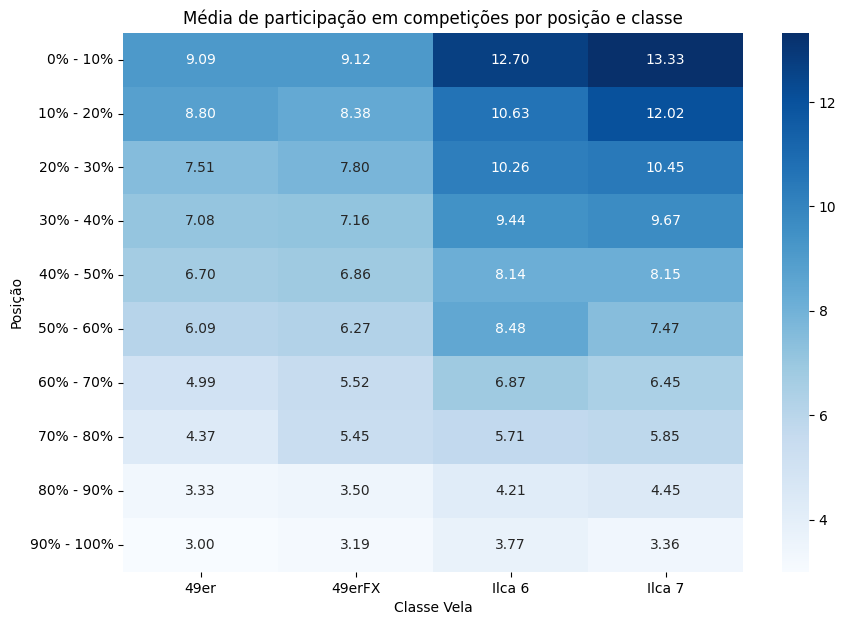

In [292]:
# plot a heatmap with the data above
plt.figure(figsize=(10,7))
plt.title('Média de participação em competições por posição e classe')
sns.heatmap(media_participacao_colocados.pivot(index='Posição', columns='Classe Vela', values='Média de Participação'), annot=True, fmt=".2f", cmap="Blues")
plt.show()